### <center>Логистическая регрессия</center>

#### Линейный классификатор

Перед тем, как непосредственно перейти к логистической регрессии, рассмотрим задачу линейной классификации в целом. И начнем с самого простого ее варианта - бинарной классификации. В этом случае мы будем определять к какому из двух классов можно отнести объект.  
  
Вы уже знакомы с линейной регрессией, а линейный классификатор устроен очень похоже. В линейной регрессии чтобы получить отклик "$y$" мы складывали все признаки с весами (добавив еще вес для свободного коэффициента):

$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$

В случае регрессии нас все устраивало. Мы получали в "$y$" какое-либо вещественное значение, а в задаче классификации нам нужно получить метку класса - "+" или "-" ("+1" или "-1", "0" или "1"). Для этого можно взять знак от выражения для регрессии:

$y(x) = sign(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)$ - это и есть формула линейного классификатора.

В математике функция $sign(x)$ (знак числа) определена так:   
$sign(x) = 1$, если $x > 0,$   
$sign(x) = -1$, если $x < 0$,   
$sign(x) = 0$, если $x = 0$.

Теперь давайте разберемся, какой геометрический смысл у линейного классификатора. 

$w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$ - это уравнение гиперплоскости, причем эта плоскость расположена перпендикулярно вектору весов этой модели. Таким образом, эта плоскость делит пространство на два класса, и все объекты, которые находятся с одной стороны относит к классу "+1", а те которые с другой стороны - к классу "-1" (см. левую часть рисунка).

<img src="linearNonlinear.png">  


Если это можно сделать без ошибок, то обучающая выборка называется *линейно разделимой*. А в случае, если разделяющая классы поверхность уже не является  плоскостью, говорят о нелинейном классификаторе (см. правую часть рисунка).  

Если посмотреть на данное разделение в двумерном пространстве, то разделяющая плоскость превратится в линию. Если объект располагается над ней, то алгоритм относит его к классу "+", а если под ней, то к классу "-". Очевидно, что изображенный на рисунке классификатор ошибается довольно часто.  

<img src="logreg2.png" width=60%> 

#### Логистическая регрессия

Логистическая регрессия - это частный случай линейного классификатора. Она относится к методам обучения с учителем. И здесь так же, как и в линейной регрессии, по признаковому описанию объекта (по вектору признаков) предказывается значение отклика (целевой переменной). А именно, вероятность принадлежности объекта к классу. 

Известно, что все регрессионные модели имеют следующий вид:

$y = F(x_1,x_2,...,x_n)$

И, теоретически, ничто нам не мешает ее использовать в задаче классификации. Мы можем воспользоваться градиентным спуском и подобрать веса модели в зависимости от признаков и ответа на объектах выборки.
Допустим, мы ее применили для классификации в задаче "Пойдет ли завтра дождь?": класс "+" будет означать, что пойдет, а "-", что не пойдет. В результате, линейная регрессия даст ответ который может быть любым вещественным числом в диапазоне от $-\infty$ до $+\infty$. Получается, что нам нужна функция которая позволит преобразовать пространство всех вещественных чисел в диапазон от $[0,1]$, т.к. мы хотим рассчитать вероятность.

Такая функция есть, она принадлежит семейству обобщенных линейных моделей, и называется она "сигмоида":

$$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$

$$z = F(x_1,x_2,...,x_n)$$

Для одномерного случая: $w_1x + w_0$
- значение $w_0$ (свободный коэффициент) определяет положение центра сигмоиды на числовой оси;
- а вес при единственном признаке $w_1$ определяет форму сигмоиды.

Если $w_1$ положительный, то сигмоида возрастающая, а если отрицательный, то убывающая.

<img src="sigm.png"> <img src="sigm2.png"> 

Чем больше значение $w_1$ по модулю, тем больше будет наклон сигмоиды к области ее середины: <img src="sigm3.png"> 

Таким образом, логистическая регрессия прогнозирует вероятность отнесения примера к классу "+" (при условии, что мы знаем его признаки и веса модели) как сигмоид-преобразование линейной комбинации вектора весов модели "$w$" и вектора признаков "$x$":

$$y = \frac{1}{1 + \exp^{-(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)}}$$

В результате, мы получаем значение "$y$" в диапазоне от $[0,1]$ - и это будет вероятность того, что данный объект принадлежит к классу "+". А итоговую метку класса мы сможем назначить, сравнивая эту вероятность с 0.5 (центр сигмоиды). Соответственно, класс "+" будет при y > 0.5, а класс "-" при y <= 0.5

Получается, что самое главное в классификации логистической регрессией - подобрать веса $w$ при признаках в показателе степени $e$. Эту задачу можно решить при помощи метода максимального правдоподобия.

#### Метод максимального правдоподобия

Метод максимального правдоподобия (англ. maximum likelihood estimation) в математической статистике — это метод оценивания неизвестного параметра путём максимизации функции правдоподобия. Он основан на предположении о том, что вся информация о статистической выборке содержится в функции правдоподобия.

Это метод поиска модели, наилучшим образом описывающей обучающую выборку, полученную с некоторым неизвестным распределением. С его помощью можно подобрать такую оценку, при которой вероятность получить имеющиеся данные максимальна. Давайте разберем его на примере.

Допустим, по пути из школы домой вы задали один и тот же вопрос 10 случайным людям.  
<center><b>"Нравится ли вам погода сегодня?"</b></center>

\begin{array}{rr} \hline
Респондент &{Ответ } \\ \hline
1 &нравится \\ 
2 &нет \\ 
3 &нравится \\ 
4 &нет \\ 
5 &нравится \\ 
6 &нравится \\ 
7 &нравится \\ 
8 &нравится \\
9 &нет \\ 
10 &нравится \\ 
\end{array}

Теперь у нас есть обучающающая выборка из 10 людей. И мы предполагаем, что вероятность того, что погода сегодня нравится случайному человеку равно некоему значению "$p$".

\begin{array}{rr} \hline
Респондент &{Ответ } \\ \hline
1 &p \\ 
2 &(1-p) \\ 
3 &p \\ 
4 &(1-p) \\ 
5 &p \\ 
6 &p \\ 
7 &p \\ 
8 &p \\
9 &(1-p) \\ 
10 &p \\ 
\end{array}

Тогда вероятность получить такую же картину как в таблице будет равна произведению вероятностей, так как мы считаем эти события независимыми:  
$$p\cdot (1-p)\cdot p\cdot(1-p)\cdot p\cdot p\cdot p\cdot p\cdot (1-p)\cdot p  $$

Упростив, мы получим функцию:  
$$p^7\cdot (1-p)^3$$

И теперь подберем такое значение "$p$" при котором эта вероятность максимальна.

Визуально это означает найти точку на оси $x$, которой соответствует вершина этого графика: <img src="p.png">

Как вы знаете, чтобы найти максимум функции, придется брать ее производную. Производную от суммы брать проще, чем от произведения, поэтому, чтобы облегчить себе жизнь, математики решили сначала логарифмировать эту функцию, а потом брать производную.

$$L = \log({p^7(1-p)^3})$$

<img src="logp.png">

Функцию $p^7\cdot(1-p)^3$ называют <b>функцией правдоподобия</b>, а $\log({p^7(1-p)^3})$ - <b>логарифмической функцией правдоподобия</b>. Само же значение $p$, при котором и функция правдоподобия и логарифмическая функция правдоподобия принимают максимальные значения, называют <b>оценкой максимального правдоподобия</b>. 

<center>Итак, найдем оценку максимального правдоподобия для нашего примера.</center>

<b>Шаг 1:</b>   
По выборке выводим функцию правдоподобия:  

$p\cdot (1-p)\cdot p\cdot(1-p)\cdot p\cdot p\cdot p\cdot p\cdot (1-p)\cdot p$  

<b>Шаг 2:</b>   
Берем логарифм от этой функции и упрощаем ее.

$L = \log({p^7(1-p)^3}) = \log{p^7} + \log{(1-p)^3} = 7\log{p} + 3log{(1-p)}$  

<b>Шаг 3:</b>   
Дифференцируем (берем производную по $p$) логарифмическую функцию правдоподобия $L$ и приравниваем к нулю:  

$7 \cdot \frac{1}{p} - 3 \cdot \frac{1}{1-p} = 0$

Домножаем обе части на $p(1-p)$:

$(7\cdot \frac{1}{p} - 3 \cdot\frac{1}{1-p})\cdot p(1-p) = 0\cdot p(1-p)$    
  
$7(1-p) - 3p = 0$    

$7-10p = 0$    

$p = 0.7$ - и вот она, максимальная оценка правдоподобия!

### <center>Домашняя работа</center>
Представьте, что на следующий день вы шли из школы в два раза дольше и успели опросить больше, но совсем других случайных людей. И вот какие ответы получили.
<center><b>"Нравится ли вам погода сегодня?"</b></center>

\begin{array}{rr} \hline
Респондент &{Ответ } \\ \hline
1 &да \\ 
2 &нет \\ 
3 &нет \\ 
4 &нет \\ 
5 &да \\ 
6 &нет \\ 
7 &да \\ 
8 &да \\
9 &нет \\ 
10 &да \\ 
11 &да \\ 
12 &да \\ 
13 &нет \\ 
14 &да \\ 
15 &да \\ 
\end{array}

Рассчитайте максимальную оценку правдоподобия для этого случая.

Итак, тем кто выполнил домашку уже стало понятно -- максимальная оценка правдоподобия (в данном случае) совпадает с эмпирическим средним по выборке (из 15 человек, 9 рады сегодняшней погоде, т.о. 9/15 = 0.6). 

Отлично, скажете Вы, но как умение строить подобные оценки помогает при решении более сложных задач? 

#### Как использовать метод максимального правдоподобия для построения классификатора?

C этого момента сфокусируемся на задаче бинарной классификации, в которой метка класса(ответа) может принимать лишь два значения. 

Пример: допустим мы хотим научиться классифицировать приходящих в банк за кредитом людей на ***хороших заемщиков*** или ***плохих заемщиков***, и предсказать вероятность невозврата кредита. Тогда метки классов можно обозначить за 0 и 1. 

Для решения задачи бинарной классификации можно не придумывать ничего нового и воспользоваться старой доброй линейной регрессией, которую мы с таким трудом постигали в прошлом полугодии.

<img src='lr_credit_scoring.png'>

По обучающей выборке была настроена модель линейной регрессии. Получается, что при задолженности
2000\$ "вероятность" просрочить платеж по кредиту равна 0.2, при задолженности 500\$ — нулю, а при меньших
значениях и вовсе отрицательная. Также, если задолженность больше 10000\$, "вероятность" просрочки будет
больше 1. 

Все это не вяжется со здравым смыслом, т.к. вероятность находится в диапазоне от 0 до 1, а модель предсказывает нам числа от -$\infty$ до $\infty$. Не понятно, как интерпретировать такой результат. 

Поэтому мы выдвинем гипотезу о том, что вероятность невозврата кредита описывается некой функцией  
$$ h_{\theta}(x)  = \sigma(\theta, x) = \frac{1}{1 + e^{\theta^{T}x}} = \frac{1}{1 + e^{z}} = \sigma(z)$$, где $$   <center>$\theta$ -- неизвестные параметры, $x$ -- признаковое описание заемщика</center> 

Если мы подберем параметры $\theta$ для наших данных так, чтобы $\sigma(\theta, x)$ ***максимально правдоподобно*** описывала нашу обучающую выборку, то в результате получим неплохой бинарный классификатор.

<img src='lr_credict_scoring_sigmoid.png'>

Итак, мы предположили что вероятность невозврата кредита есть величина

$$Pr(y = 1  \mid  x, \theta) = h_{\theta}(x)$$ 

тогда вероятность того, что кредит банку вернут есть

$$Pr(y = 0  \mid x, \theta) = 1 - h_{\theta}(x)$$ 

В общем вероятность получить какую либо метку класса можно записать следующим образом

$$Pr(y \mid x, \theta) = h_{\theta}(x)^{y} (1 - h_{\theta}(x))^{1-y}$$ 

Предположим что наша тренировочная выборка состоит из $m$ независимых наблюдений, тогда мы можем составить функцию правдоподобия

\begin{equation}
\begin{aligned}
L(\theta) = {} & \prod_{i=1}^{m} Pr(y \mid x^{i}, \theta) = \\
      & \prod_{i=1}^{m} h_{\theta}(x)^{y^{i}} (1 - h_{\theta}(x^{i}))^{1-y^{i}} \\
\end{aligned}
\end{equation}

Зачем она нам нужна вообще? Вспоминаем, наша цель - подобрать параметры $\theta$ таким образом чтобы модель наиболее правдоподобно описывала наши данные. В этом и есть математический смысл обучения.


На практике работать с произведениями довольно неудобно, поэтому будем использовать с логарифмическую функцию правдоподобия.

\begin{equation}
\begin{aligned}
l(\theta) = {} & \log(l(\theta)) =  \\
      & \sum_{i=1}^{m} y^{i}\log(h_{\theta}(x)) + (1-y^{i})\log(1 - h_{\theta}(x^{i})) \\
\end{aligned}
\end{equation}

Пока что это очень страшные для Вас формулы, но мы обязательно разберем их смысл. Поверьте мне, он весьма прост.

В школе Вам наверняка уже рассказывали (или еще расскажут) как искать минимальное или максимальное значение любой функции. Сейчас нам понадобится взять производную от $l(\theta)$, но чтобы не утомлять вас этим скучным занятием, я просто прошу Вас поверить на слово что она равна следующему выражению

\begin{equation}
\begin{aligned}
\frac{d}{d\theta_j}l(\theta) = (y - h_{\theta}(x))x_j
\end{aligned}
\end{equation}

Что дает нам эта формула? Она показывает нам как нужно изменять параметры в градиентном спуске чтобы придти в точку оптимума. Очень похожа на формулу обновления весов для линейной регрессии, не првда ли? 

Откройте конспекты прошлых занятий и убедитесь сами!

Прямо с этого момента мы с Вами потенциально готовы к тому чтобы самому написать алгоритм обучения логистической регрессии.

$$ \theta_j ^ {new} = \theta_j ^ {old} + \alpha (y^{i} - h_{\theta}(x^{i})) x_j$$

### Демо

Сгенерируем случайный датасет и попытаемся запрограммировать логистическую регрессию

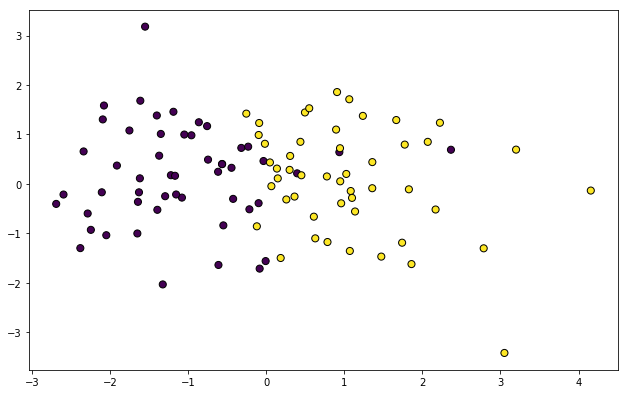

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(20, 20))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=50, edgecolor='k')

In [45]:
import numpy as np 


def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target * scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    history = []
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        if step % 100 == 0:
            llhood  = log_likelihood(features, target, weights)
            history.append(-1 * llhood)
#             print(llhood)
        
    return weights, history

In [46]:
weights, llhood = logistic_regression(X1, Y1, num_steps = 20000, learning_rate = 5e-6, add_intercept=True)

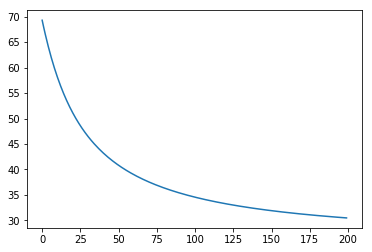

In [47]:
plt.plot(np.arange(0,len(llhood)), llhood)